# Load the dataset
I load the laptop dataset from the `data` folder into a pandas DataFrame.
This will be used in all the next steps.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH = Path("..") / "data" / "laptop_price - dataset.csv"

df = pd.read_csv(DATA_PATH)
df_clean = df.copy()

print("Loaded dataset shape:", df_clean.shape)
df_clean.head()


Loaded dataset shape: (1275, 15)


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


# Plot the price of all laptops
I plot the laptop price as a function of the row index in the dataset.
This provides an overall view of the prices and helps spot extreme values.


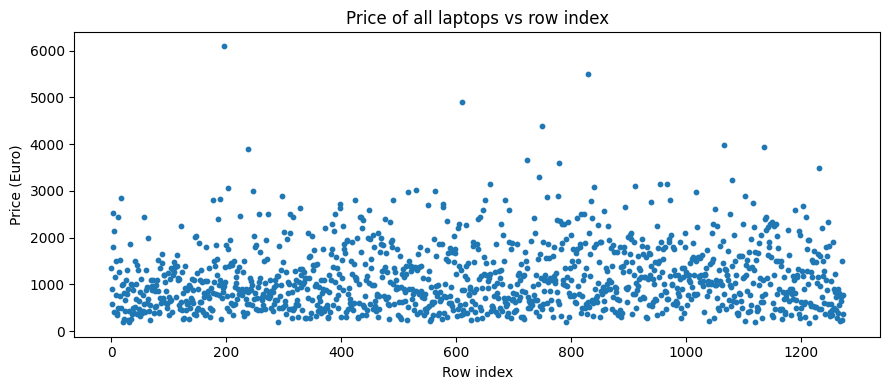

In [31]:
plt.figure(figsize=(9,4))
plt.scatter(df_clean.index, df_clean["Price (Euro)"], s=10)
plt.title("Price of all laptops vs row index")
plt.xlabel("Row index")
plt.ylabel("Price (Euro)")
plt.tight_layout()
plt.show()


# Most expensive company (on average)
I compute the average laptop price for each company and identify the company with the highest average price.


In [32]:
avg_price_by_company = (
    df_clean.groupby("Company")["Price (Euro)"]
    .mean()
    .sort_values(ascending=False)
)

print("Most expensive company on average:", avg_price_by_company.index[0])
print("Average price (Euro):", avg_price_by_company.iloc[0])

avg_price_by_company.head(10)


Most expensive company on average: Razer
Average price (Euro): 3346.1428571428573


Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Name: Price (Euro), dtype: float64

# Operating systems (OpSys) and cleaning
I list the operating systems in the dataset. Some systems are written differently (e.g., "Mac OS X" vs "macOS"),
so I standardize them to make the categories uniform.


In [33]:
print("Unique OpSys BEFORE:", sorted(df_clean["OpSys"].unique()))

# Make the OS names uniform
df_clean["OpSys_clean"] = df_clean["OpSys"].replace({
    "Mac OS X": "macOS",
    "Windows 10 S": "Windows 10"
})

print("Unique OpSys AFTER:", sorted(df_clean["OpSys_clean"].unique()))
print("Number of unique OpSys AFTER:", df_clean["OpSys_clean"].nunique())


Unique OpSys BEFORE: ['Android', 'Chrome OS', 'Linux', 'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS']
Unique OpSys AFTER: ['Android', 'Chrome OS', 'Linux', 'No OS', 'Windows 10', 'Windows 7', 'macOS']
Number of unique OpSys AFTER: 7


#Price distribution by operating system
For each operating system type, I plot the distribution of laptop prices.
The number of plots equals the number of unique operating systems (7 after cleaning).


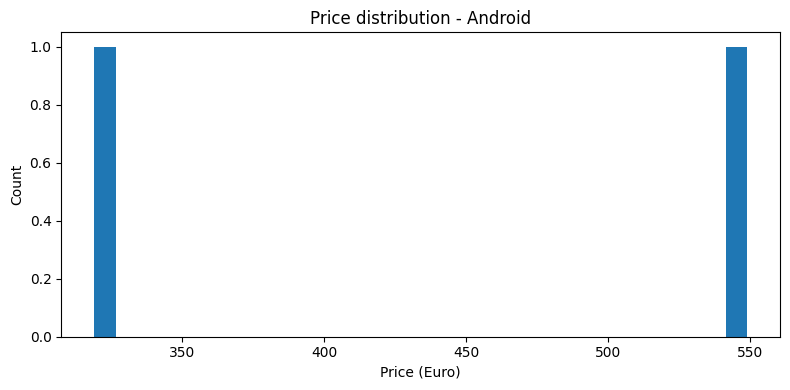

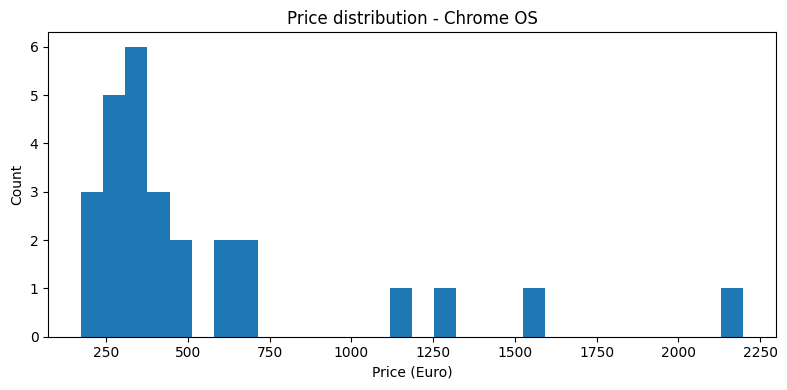

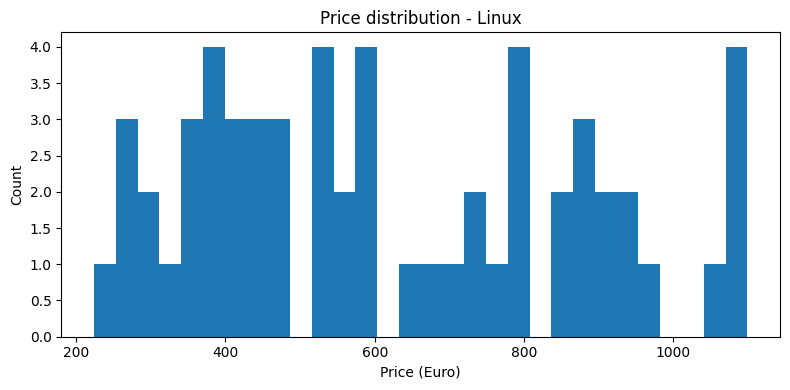

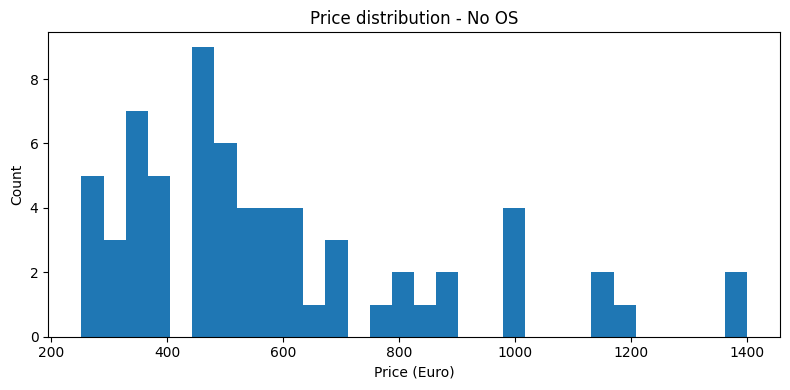

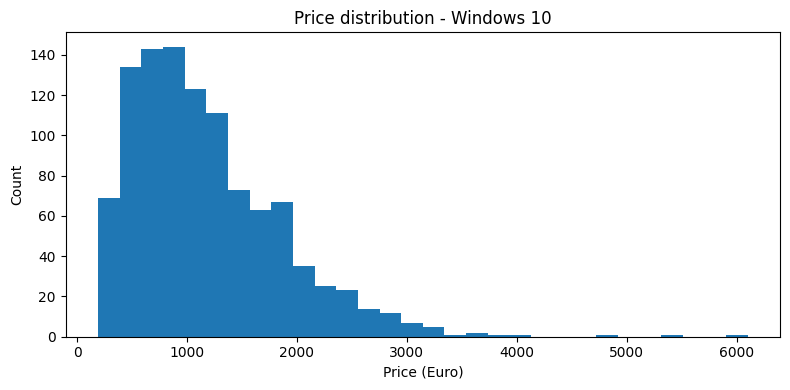

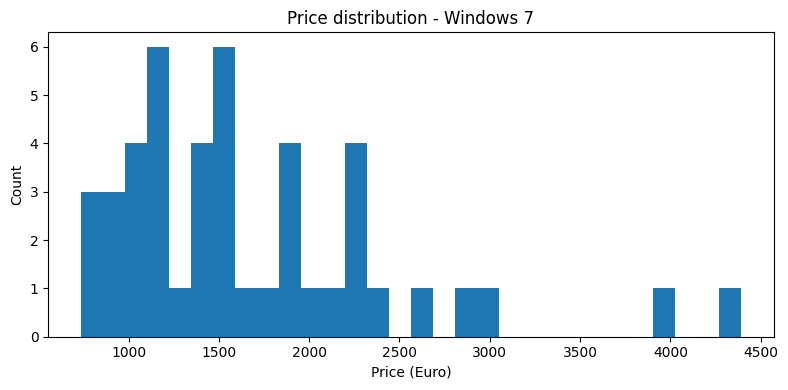

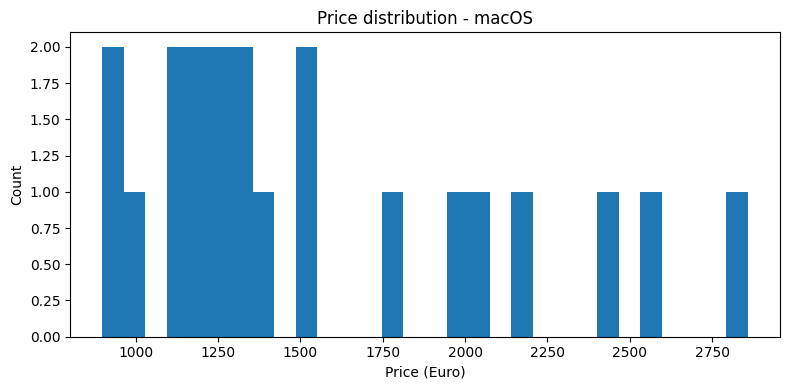

In [34]:
ops = sorted(df_clean["OpSys_clean"].unique())

for os_name in ops:
    prices = df_clean.loc[df_clean["OpSys_clean"] == os_name, "Price (Euro)"]

    plt.figure(figsize=(8,4))
    plt.hist(prices, bins=30)
    plt.title(f"Price distribution - {os_name}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


# Relationship between RAM and price + outliers
I plot the relationship between RAM (GB) and laptop price (Euro) using a scatter plot.
An outlier is an extreme price value that is unusually far from the typical range.
I detect outliers in price using the IQR rule: values below Q1-1.5*IQR or above Q3+1.5*IQR.


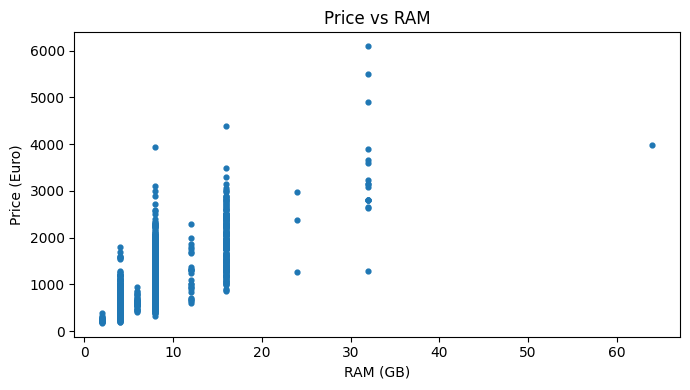

In [35]:
plt.figure(figsize=(7,4))
plt.scatter(df_clean["RAM (GB)"], df_clean["Price (Euro)"], s=12)
plt.title("Price vs RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euro)")
plt.tight_layout()
plt.show()


In [36]:
q1 = df_clean["Price (Euro)"].quantile(0.25)
q3 = df_clean["Price (Euro)"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df_clean[(df_clean["Price (Euro)"] < lower) | (df_clean["Price (Euro)"] > upper)]

print("IQR bounds for outliers:", lower, "to", upper)
print("Number of outlier laptops:", len(outliers))

# Show a few extreme examples
outliers[["Company", "Product", "RAM (GB)", "Price (Euro)"]].sort_values("Price (Euro)", ascending=False).head(10)


IQR bounds for outliers: -722.25 to 2827.75
Number of outlier laptops: 28


,Company,Product,RAM (GB),Price (Euro)
196,Razer,Blade Pro,32,6099.0
830,Razer,Blade Pro,32,5499.0
610,Lenovo,Thinkpad P51,32,4899.0
749,HP,Zbook 17,16,4389.0
1066,Asus,ROG G701VO,64,3975.0
1136,HP,ZBook 17,8,3949.4
238,Asus,ROG G703VI-E5062T,32,3890.0
723,Dell,Alienware 17,32,3659.4
780,Dell,Alienware 17,32,3588.8
1231,Razer,Blade Pro,16,3499.0


# Create "Storage type" from the "Memory" column
I create a new column called "Storage type" by extracting the storage technology from the "Memory" column
(e.g., SSD, HDD, Flash Storage, SSHD, Hybrid). If multiple types appear (e.g., "SSD + HDD"), I store them as a combined label.


In [37]:
def extract_storage_type(mem: str) -> str:
    mem = str(mem)
    
    # If the word Hybrid appears, treat it directly as Hybrid
    if "Hybrid" in mem:
        return "Hybrid"
    
    types = []
    if "Flash Storage" in mem:
        types.append("Flash Storage")
    if "SSHD" in mem:
        types.append("SSHD")
    if "SSD" in mem:
        types.append("SSD")
    if "HDD" in mem:
        types.append("HDD")
        
    if not types:
        return "Unknown"
    
    # remove duplicates while keeping order
    uniq = []
    for t in types:
        if t not in uniq:
            uniq.append(t)
    return "+".join(uniq)

df_clean["Storage type"] = df_clean["Memory"].apply(extract_storage_type)

# Show examples
df_clean[["Memory", "Storage type"]].head(15)


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
5,500GB HDD,HDD
6,256GB Flash Storage,Flash Storage
7,256GB Flash Storage,Flash Storage
8,512GB SSD,SSD
9,256GB SSD,SSD
